# Project: A Data Science Blog Post - based on Airbnb data (Amsterdam - 2024)

## Table of Contents
<ul>
<li><a href="#intro">I. Introduction and Business Understanding </a></li>
    <ul>
         <li><a href="#descr">Dataset Description</a></li> <!-- Sub-item -->
         <li><a href="#quest">Questions for Analysis</a></li> <!-- Sub-item -->        
    </ul>
<li><a href="#dataunderstanding">II. Data Understanding</a></li>
<li><a href="#prep">III. Data Preparation</a></li>
<li><a href="#modeling">IV. Data Modeling and Result Evaluation</a></li>
<li><a href="#conclusions">V. Conclusions</a></li>
</ul

<a id='intro'></a>
## I. Introduction and Business Understanding

In this Analysis we would like to develop a mechanism suggesting relevant pricing of Airbnb listing (property) in Amsterdam based on the major characteristics of a property:
> We will start from identifying characteristics of a listing (e.g. rating, number of bedrooms etc.), which have the highest correlation to price
> 
> Predict pricing based on the selected characteristics of a train dataset
> 
> Compare results of the predicted prices (suggested pricing of a listing) against test data using R-squared (R²) statistical measure

<a id='descr'></a>
### Dataset Description
This Analysis was made possible thanks to the courtesy of Airbnb in sharing Amsterdam listings data. The data can be accessed via https://insideairbnb.com/get-the-data/ (please refer to Amsterdam, North Holland, The Netherlands - 05 September, 2024 - listings.csv.gz file https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2024-09-05/data/listings.csv.gz. For the efficiency purposes the same csv file was attached as well as part of the current repository.

Original dataset contains 75 columns, of which we have selected 13 columns relevant for our analysis.   

In [17]:
#Please find below the description of the relevant columns: 

# Column							Description

# id								a listing unique identifier
# host_since						date host user was created
# neighbourhood_cleansed			Amsterdam Region / Areas
# property_type	
# room_type	
# accommodates						maximum capacity of a listing
# bedrooms							number of bedrooms
# price	
# number_of_reviews					number of review over the lifetime of a listing
# number_of_reviews_ltm				number of reviews in the last 12 months
# review_scores_rating	
# calculated_host_listings_count	number of listing the host has in Amsterdam
# reviews_per_month					the average number of reviews per month over the lifetime of a listing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [2]:
# Loading Airbnb Amsterdam Sep-2024 data
df_original=pd.read_csv('listings.csv')

In [4]:
df_original.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6624170,https://www.airbnb.com/rooms/6624170,20240905174946,2024-09-05,previous scrape,"Warm, cozy sunlighted downtown appt",2 room appt. 1.8 km from central station with ...,NaN,https://a0.muscache.com/pictures/df91da10-f7d4...,34670170,...,4.86,4.56,4.65,0363 3CF3 3233 3B24 6BEC,f,1,1,0,0,0.38
1,8837071,https://www.airbnb.com/rooms/8837071,20240905174946,2024-09-05,previous scrape,Cozy apartment in city center,Located in Amsterdam's sweet spot. A stone's t...,see the guide,https://a0.muscache.com/pictures/5fee12d4-61d0...,13034277,...,NaN,NaN,NaN,0363 0C20 1768 FAAA 3556,f,1,1,0,0,NaN
2,716107,https://www.airbnb.com/rooms/716107,20240905174946,2024-09-05,previous scrape,Loft style home nearby city centre,NaN,NaN,https://a0.muscache.com/pictures/9927048/b367a...,3689867,...,4.83,4.66,4.61,0363 0014 1E57 F097 81A5,f,1,1,0,0,1.21
3,664538756986273255,https://www.airbnb.com/rooms/664538756986273255,20240905174946,2024-09-06,previous scrape,Geweldige duurzame eco woonark op unieke plek!,This unique eco houseboat is located in the mo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7647768,...,5.00,5.00,5.00,0363 468D A0A1 6595 5E39,f,1,1,0,0,0.04
4,8191077,https://www.airbnb.com/rooms/8191077,20240905174946,2024-09-05,previous scrape,Old bar apartment,This just renovated apartment for 6 persons is...,Our apartment is situated in the centre of Ams...,https://a0.muscache.com/pictures/miso/Hosting-...,43205475,...,4.79,4.83,4.45,Exempt,f,1,0,1,0,2.41


<a id='quest'></a>
### Questions for Analysis

1. What are the major characteristics, which have the highest correlation with pricing of the listing (property) in Airbnb Amsterdam in 2024? including:
   > Amsterdam regions
   > 
   > Room type
   >
   > Property type
   >
   > Number of accommodates
   >
   > Number of bedrooms
   >
   > Number of Reviews
   >
   > Number of Review Last 12 months
   >
   > Review Score Total rating
   >
   > Number of listings of the host
   > 
   > Number of reviews per month
   >
   > Host since (date)
   
2. Can we predict prices / develop pricing recommendation mechanism based on the selected characteristics?
3. How reliable are suggested prices compared to the test dataset using R-squared statistical measure?

<a id='dataunderstanding'></a>
## II. Data Understanding

Via reviewing data below, we have identified the following areas, where data should be pre-processed before analysis:
> we should select only the relevant columns for our analysis (out of the total 75);
>
> data types should be correctly defined, for example prices contain $ and comma signs and in string format as well as other columns in the dataset should change data types;
>
> dataset contains missing values that should be cleaned for our further analysis.

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9659 non-null   int64  
 1   listing_url                                   9659 non-null   object 
 2   scrape_id                                     9659 non-null   int64  
 3   last_scraped                                  9659 non-null   object 
 4   source                                        9659 non-null   object 
 5   name                                          9659 non-null   object 
 6   description                                   9310 non-null   object 
 7   neighborhood_overview                         5469 non-null   object 
 8   picture_url                                   9659 non-null   object 
 9   host_id                                       9659 non-null   i

<a id='prep'></a>
## III. Data Preparation

A. Below we would like to select only relevant columns for our analysis:

In [6]:
df = pd.DataFrame(df_original).copy()

df=df[['id','host_since','neighbourhood_cleansed','property_type','room_type','accommodates','bedrooms','price','number_of_reviews','number_of_reviews_ltm','review_scores_rating','calculated_host_listings_count','reviews_per_month']]

In [6]:
df.head()

,id,host_since,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,6624170,2015-05-31,Centrum-Oost,Entire rental unit,Entire home/apt,3,1.0,NaN,43,0,4.84,1,0.38
1,8837071,2014-03-11,De Baarsjes - Oud-West,Entire rental unit,Entire home/apt,2,1.0,NaN,0,0,NaN,1,NaN
2,716107,2012-09-27,De Baarsjes - Oud-West,Entire rental unit,Entire home/apt,2,1.0,NaN,172,8,4.71,1,1.21
3,664538756986273255,2013-07-22,Oud-Noord,Houseboat,Entire home/apt,3,2.0,NaN,1,0,5.00,1,0.04
4,8191077,2015-09-02,Centrum-Oost,Room in boutique hotel,Private room,6,1.0,NaN,251,53,4.61,1,2.41


B. we will extract and use only Host since **year** from the Host since date column for our analysis

In [7]:
# extracting only year of Host since data
df.loc[:, 'host_since'] = df['host_since'].str[:4]
df.rename(columns={'host_since': 'host_since_year'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9659 non-null   int64  
 1   host_since_year                 9659 non-null   object 
 2   neighbourhood_cleansed          9659 non-null   object 
 3   property_type                   9659 non-null   object 
 4   room_type                       9659 non-null   object 
 5   accommodates                    9659 non-null   int64  
 6   bedrooms                        9385 non-null   float64
 7   price                           5869 non-null   object 
 8   number_of_reviews               9659 non-null   int64  
 9   number_of_reviews_ltm           9659 non-null   int64  
 10  review_scores_rating            8632 non-null   float64
 11  calculated_host_listings_count  9659 non-null   int64  
 12  reviews_per_month               86

C. **Dealing with missing values**. We have decided to remove listings without price indication and without rating, as those columns are essential for our analysis and any inference of the missing data could cause incorrect predictions of prices.
We believe that entries without prices and ratings are less relevant for the purpose of our analysis.

In [9]:
# removing missing values in price and review columns
df = df.dropna(subset=['price', 'review_scores_rating'])

In [10]:
df.isnull().sum()

id                                0
host_since_year                   0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          3
price                             0
number_of_reviews                 0
number_of_reviews_ltm             0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

As per above we see that in the cleaned data after the first iteration we have only 3 missing data entries in number of bedrooms column. As number of entries are not significant to the total (only 3 entries), we have decided to fill them with mean value of number of bedrooms in that case.

In [11]:
# Applying mean value technique to fill-in missing entries for the number of bedrooms
fill_mean = lambda col: col.fillna(col.mean()) # Mean function
df['bedrooms'] = fill_mean(df['bedrooms'])  # Apply it to the bedrooms column

In [12]:
# Checking the output whether we still have missing values or not
df.isnull().sum()

id                                0
host_since_year                   0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
price                             0
number_of_reviews                 0
number_of_reviews_ltm             0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

D. Converting data to correct data types

In [13]:
# converting to int datatype Host_since_year from object to integer
df['host_since_year'] = df['host_since_year'].astype(int)

In [14]:
# removing $ sign and comma from price column and converting string type to float data type to be able to further use price column
df['price'] = df['price'].str.replace('$', '', regex=False)  # Remove the dollar sign
df['price'] = df['price'].str.replace(',', '', regex=False) # Removing commas
df['price'] = df['price'].astype(float)  # Convert to float

In [15]:
df.nunique()

id                                5187
host_since_year                     17
neighbourhood_cleansed              22
property_type                       52
room_type                            4
accommodates                        15
bedrooms                            10
price                              593
number_of_reviews                  507
number_of_reviews_ltm              141
review_scores_rating               115
calculated_host_listings_count      17
reviews_per_month                  662
dtype: int64

In [16]:
#Convert property_type and room_type from object to category
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category')
df['property_type'] = df['property_type'].astype('category')
df['room_type'] = df['room_type'].astype('category')

In [17]:
df.head()

,id,host_since_year,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month
10,888038298563003925,2019,Centrum-West,Room in hotel,Private room,3,1.0,269.0,8,1,4.75,9,0.37
31,50666229,2021,De Baarsjes - Oud-West,Private room in bed and breakfast,Private room,4,2.0,254.0,165,65,4.92,2,4.37
32,933523,2013,IJburg - Zeeburgereiland,Private room in guesthouse,Private room,4,2.0,203.0,140,42,4.92,1,1.11
34,656222143862971193,2015,Centrum-West,Entire condo,Entire home/apt,2,1.0,599.0,14,6,4.93,1,0.56
36,20259345,2014,De Baarsjes - Oud-West,Private room in guest suite,Private room,2,1.0,109.0,712,105,4.91,2,9.06


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5187 entries, 10 to 9656
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              5187 non-null   int64   
 1   host_since_year                 5187 non-null   int32   
 2   neighbourhood_cleansed          5187 non-null   category
 3   property_type                   5187 non-null   category
 4   room_type                       5187 non-null   category
 5   accommodates                    5187 non-null   int64   
 6   bedrooms                        5187 non-null   float64 
 7   price                           5187 non-null   float64 
 8   number_of_reviews               5187 non-null   int64   
 9   number_of_reviews_ltm           5187 non-null   int64   
 10  review_scores_rating            5187 non-null   float64 
 11  calculated_host_listings_count  5187 non-null   int64   
 12  reviews_per_month       

After processing steps above, quantitative data per analysis below is within a reasonable range (max, min, mean and other statistical measures)

In [19]:
df.describe()

,id,host_since_year,accommodates,bedrooms,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,4.639658e+17,2016.013495,2.956622,1.488233,270.123771,70.077694,15.461924,4.831882,2.025641,1.472350
std,4.776140e+17,3.259714,1.444249,0.897277,235.183963,153.096242,32.336179,0.263310,3.197256,2.720393
min,2.818000e+03,2008.000000,1.000000,0.000000,11.000000,1.000000,0.000000,1.000000,1.000000,0.010000
25%,2.300552e+07,2014.000000,2.000000,1.000000,160.000000,5.000000,2.000000,4.770000,1.000000,0.360000
50%,5.679586e+17,2015.000000,2.000000,1.000000,225.000000,14.000000,5.000000,4.910000,1.000000,0.700000
75%,9.302529e+17,2018.000000,4.000000,2.000000,320.000000,62.000000,15.000000,5.000000,1.000000,1.755000
max,1.227520e+18,2024.000000,16.000000,10.000000,10000.000000,4130.000000,914.000000,5.000000,28.000000,106.080000


E. Now we would like to use one-hot encoding to convert categorical columns to a binary type needed for our predictions

In [20]:
# Convert specified categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=['neighbourhood_cleansed', 'property_type', 'room_type'], drop_first=True).astype(int)

In [21]:
df.head()

,id,host_since_year,accommodates,bedrooms,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month,...,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in houseboat,property_type_Tiny home,room_type_Hotel room,room_type_Private room,room_type_Shared room
10,-1530247659,2019,3,1,269,8,1,4,9,0,...,0,1,0,0,0,0,0,0,1,0
31,50666229,2021,4,2,254,165,65,4,2,4,...,0,0,0,0,0,0,0,0,1,0
32,933523,2013,4,2,203,140,42,4,1,1,...,0,0,0,0,0,0,0,0,1,0
34,582130489,2015,2,1,599,14,6,4,1,0,...,0,0,0,0,0,0,0,0,0,0
36,20259345,2014,2,1,109,712,105,4,2,9,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5187 entries, 10 to 9656
Data columns (total 85 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   id                                                             5187 non-null   int32
 1   host_since_year                                                5187 non-null   int32
 2   accommodates                                                   5187 non-null   int32
 3   bedrooms                                                       5187 non-null   int32
 4   price                                                          5187 non-null   int32
 5   number_of_reviews                                              5187 non-null   int32
 6   number_of_reviews_ltm                                          5187 non-null   int32
 7   review_scores_rating                                           5187 non-null   int

<a id='modeling'></a>
## IV. Data Modeling and Result Evaluation

We would like to start from the answering our first research question around what are the major characteristics of a listing that have **the highest correlation to prices** in Amsterdam (from the selected fields for our analysis).

In [23]:
# let's calculate correlation to prices
correlation = df.corr()['price'].sort_values(ascending=False)

In [24]:
print(correlation)

price                                        1.000000
bedrooms                                     0.377982
accommodates                                 0.377632
review_scores_rating                         0.122946
property_type_Entire home                    0.117032
                                               ...   
reviews_per_month                           -0.132318
number_of_reviews_ltm                       -0.139904
property_type_Private room in rental unit   -0.149236
number_of_reviews                           -0.149618
room_type_Private room                      -0.271598
Name: price, Length: 85, dtype: float64


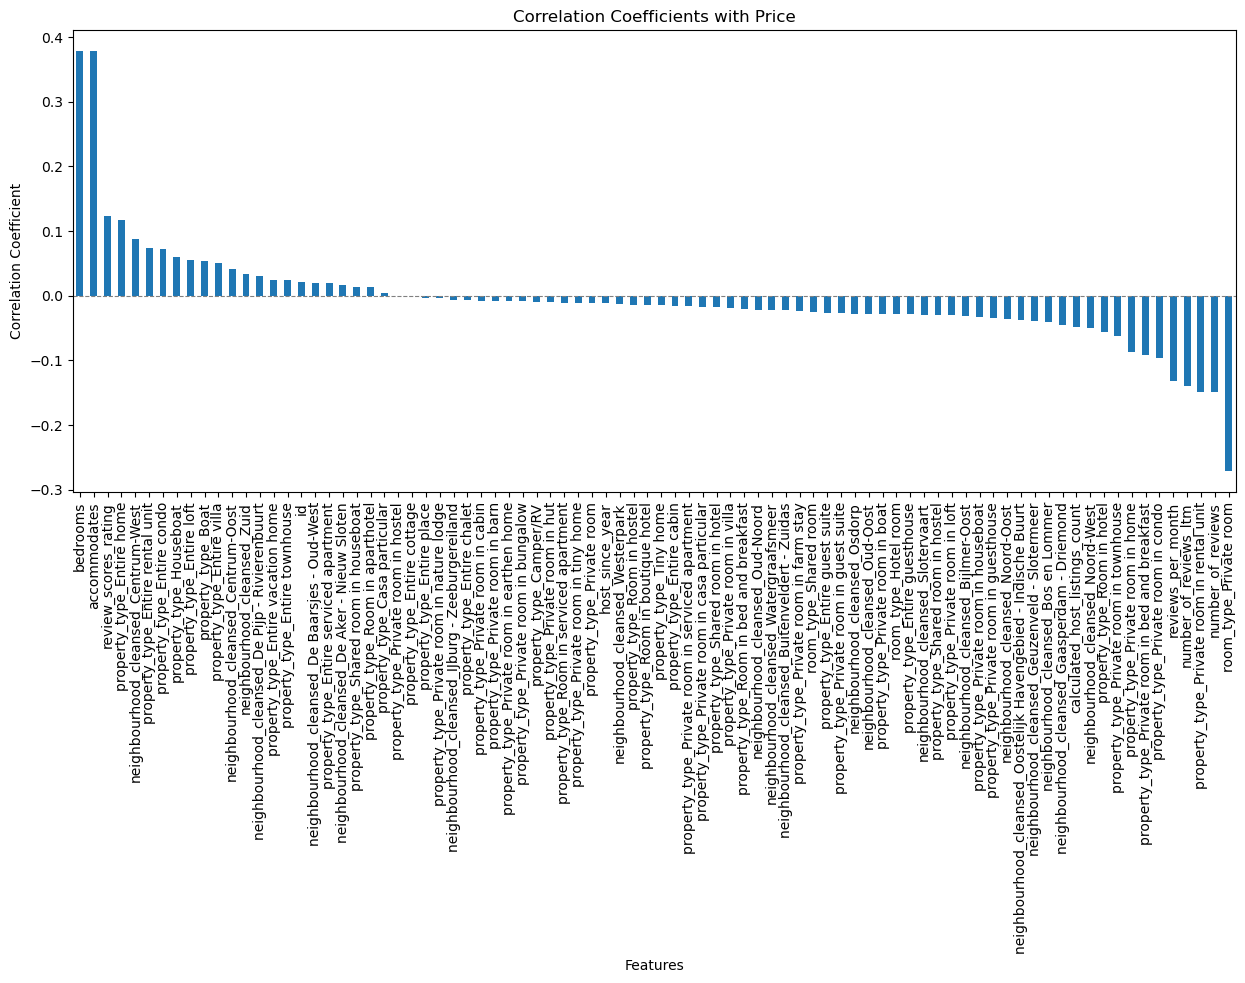

In [25]:
# Plotting the correlation coefficients
plt.figure(figsize=(15, 6))
correlation.drop('price').plot(kind='bar')
plt.title('Correlation Coefficients with Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.show()

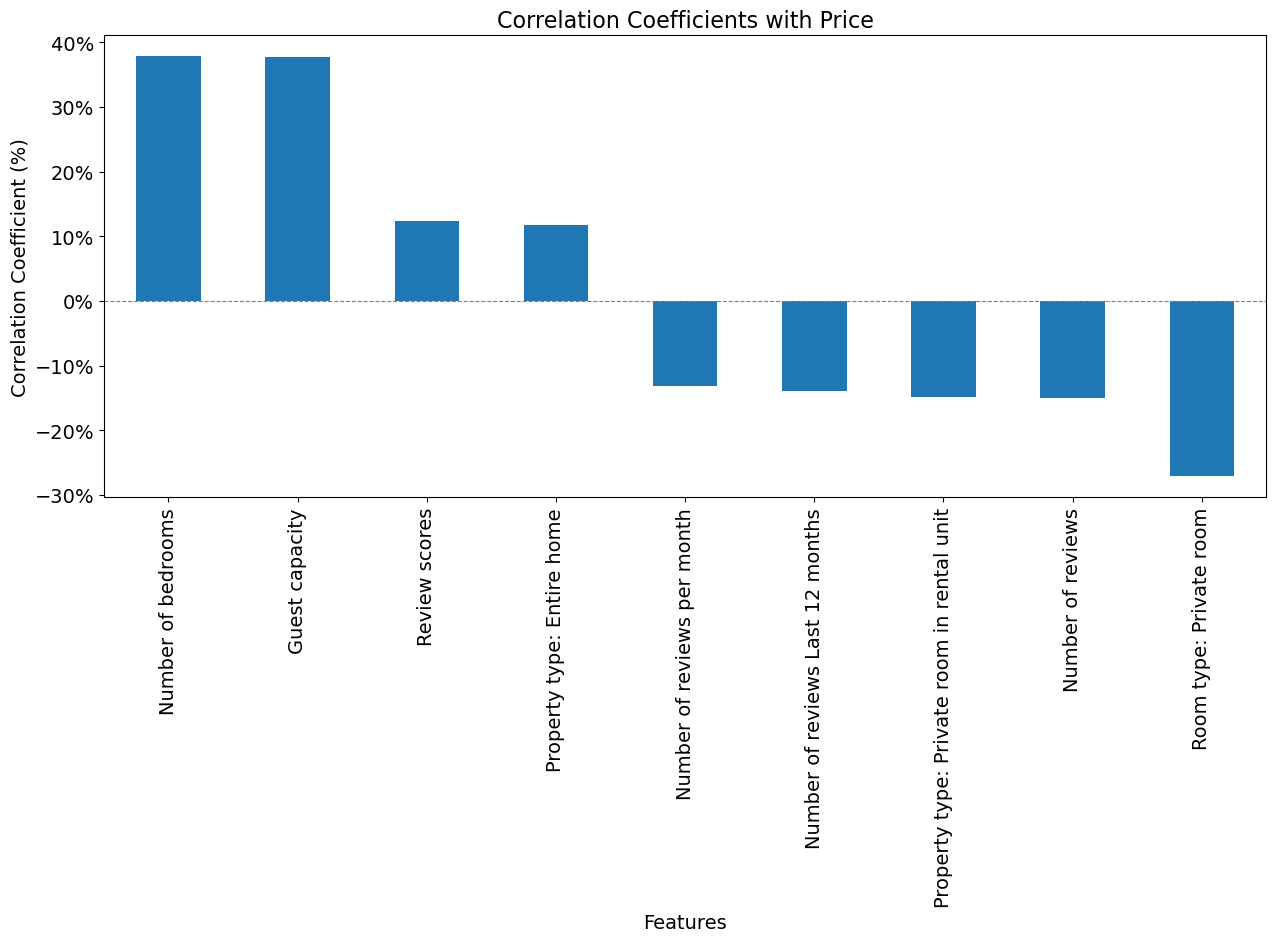

In [26]:
# Plotting the correlation coefficients for correlation above 10% and below -10%
import matplotlib.ticker as mticker

plt.figure(figsize=(15, 6))
correlation[(correlation > 0.1) | (correlation < -0.1)].drop('price').rename(index={
    'bedrooms': 'Number of bedrooms',  
    'accommodates': 'Guest capacity',  
    'review_scores_rating': 'Review scores',
    'property_type_Entire home': 'Property type: Entire home',
    'reviews_per_month': 'Number of reviews per month',
    'number_of_reviews_ltm': 'Number of reviews Last 12 months',
    'property_type_Private room in rental unit': 'Property type: Private room in rental unit',
    'number_of_reviews': 'Number of reviews',
    'room_type_Private room': 'Room type: Private room',
}).plot(kind='bar')

plt.title('Correlation Coefficients with Price', fontsize=16)
plt.ylabel('Correlation Coefficient (%)', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')


# Increase tick label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Convert y-axis to percentage
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.show()

**OBSERVATION 1** From the available fields not so many of them are being considered as having a moderate or high correlation to prices (majority in the range between 10% and (-10%) of correlation to prices).

**OBSERVATION 2** Number of bedrooms in a listing and maximum capacity of a listing (number of accommodates) have the highest positive correlation to prices, which are the good candidates for features of a price prediction. 

**OBSERVATION 3** Private room type has the highest negative correlation to prices (as a context other room types are: Hotel room, Shared room types).

**OBSERVATION 4** Surprisingly, number of reviews have negative small correlation to price. Potentially properties with high number of reviews are listed for more frequent rent and thus are not being considered as an expensive property. 

**OBSERVATION 5** On the other hand, Review scores themselves have a positive correlation to prices, indicating that the higher the review rating the higher price could be generally for the selected listings.

In the below steps we will predict prices based on the selected features, excluding columns with lower correlation between -10% and 10%, and calculate R-squared of the predictions versus test data.

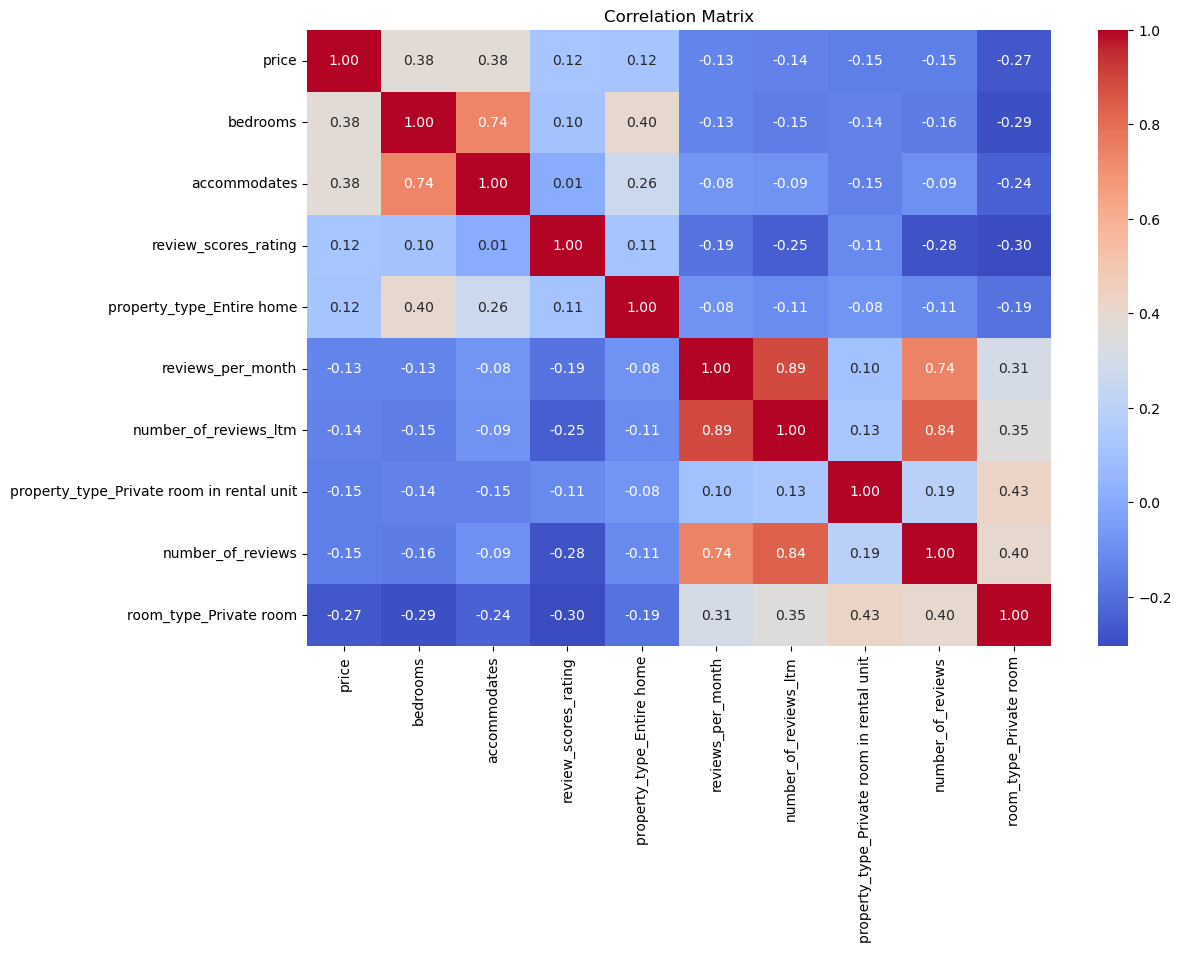

In [27]:
# Compute the correlation matrix
correlation_matrix = df[['price','bedrooms', 'accommodates', 'review_scores_rating', 'property_type_Entire home','reviews_per_month','number_of_reviews_ltm','property_type_Private room in rental unit','number_of_reviews','room_type_Private room']].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
#Split into explanatory and response variables
X = df[['bedrooms', 'accommodates', 'review_scores_rating', 'property_type_Entire home','reviews_per_month','number_of_reviews_ltm','property_type_Private room in rental unit','number_of_reviews','room_type_Private room']]

y = df['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42) 

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and fit the model
lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative 9 variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative 9 variables was 0.345276830061059 on 1557 values.'

Let's now visualize Predicted prices versus Actual prices of a test dataset

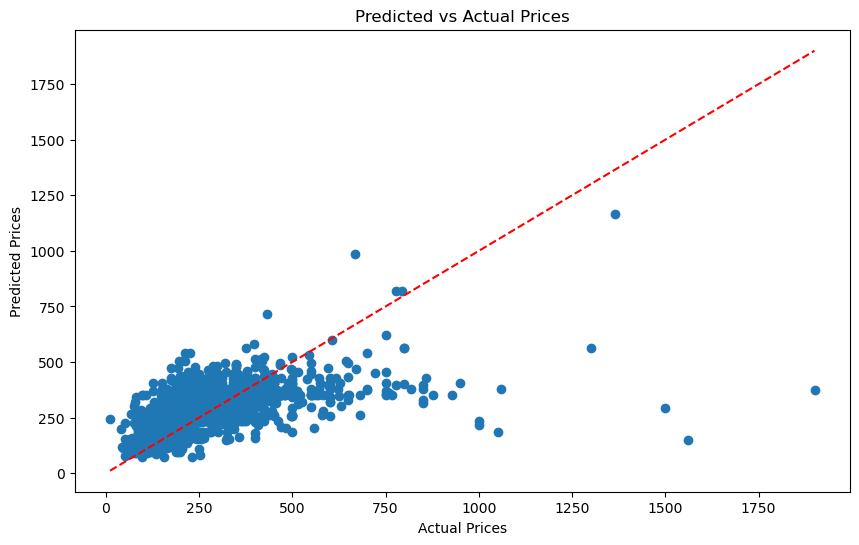

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

**OBSERVATION 6** There are number of outliers with high prices in actuals, which our model could not capture well. Potentially too high prices in Airbnb could indicate incorrectly filled or above market expectations by the hosts (as it is a self-filling platform), which could or could not be fulfilled by the demand.

Below we have generated a similar visualization without outliers to have a closer look into the results in majority of cases.

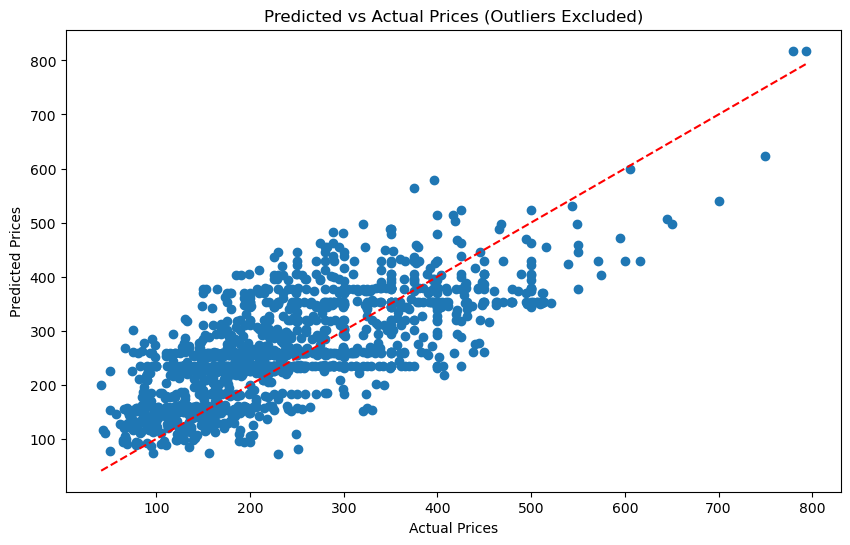

In [30]:
# Calculate the residuals
residuals = y_test - y_test_preds

# Calculate the IQR
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
mask = (residuals >= lower_bound) & (residuals <= upper_bound)
y_test_filtered = y_test[mask]
y_test_preds_filtered = y_test_preds[mask]

# Plot Predicted vs Actual Prices without Outliers
plt.figure(figsize=(10, 6))
plt.scatter(y_test_filtered, y_test_preds_filtered)
plt.plot([y_test_filtered.min(), y_test_filtered.max()], 
         [y_test_filtered.min(), y_test_filtered.max()], 'r--')
plt.title('Predicted vs Actual Prices (Outliers Excluded)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

**OBSERVATION 7** Predicted prices generally have a clear upward trend versus actual prices, indicating that as actual prices increase predicted prices have a tendency to follow that trend as well. This suggests that the model captures the positive relationship between the selected features and prices reasonably well. Furthermore, the model is better in predicting lower and medium range prices (which comprise the majority of the observed test data), while it underforecasts highly priced actual listings.

<a id='conclusions'></a>
## V. Conclusions

At the beginning of our analysis we aimed to develop a mechanism, which suggests relevant pricing of Airbnb listing (property) in Amsterdam based on the major characteristics of a property. 

Our Linear Regression model turned to be reasonably well in predicting prices, especially in a lower to medium ranges. This could indicate that if this machanism would have been implemented and be in place at Airbnb, it could potentially prevent hosts from indicating prices with extreme or way above market average prices (potentially even prevent from manual mistakes in pricing and/or suggesting prices for the missing values as a recommendation).

Additional insights:
- Number of bedrooms in a listing and maximum capacity of a listing (number of accommodates) have the highest positive correlation to prices;
- Private room type has the highest negative correlation to prices (as a context other room types are: Hotel room, Shared room types, Entire home/apt);
- Number of reviews have negative small correlation to price, while review scores themselves have a positive correlation to prices, indicating that the higher the review the higher price could be generally for the selected listings. Potentially properties with high number of reviews are listed for more frequent rent and thus are not being considered as an expensive property.

Limitations and data constraints: listings without price indication and ratings have been excluded from the analysis.

In case of an interest in the continuation of the analysis presented in this report, we could offer the following extensions:
- increasing geography to more countries of an interest;
- perform a similar analysis for the extended feature list available in the dataset, including:
> splitting overall rating into various types, e.g. cleanliness, location, communication, value, accuracy etc.;
>
> using data on availability of a listing;
>
> incorporating review rating period and dates and many more.

We hope that this Report provides you with data insights and predictions helpful in pricing of Airbnb listings in Amsterdam.